In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Ocjene studenata po ispitima

In [17]:
grades = pd.read_csv('Data/Student Grades.csv')
grades.index = ['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10']
display(grades)

,Midterm 1,Midterm 2,Final
S1,78,82,182
S2,82,85,180
S3,77,90,188
S4,75,77,149
S5,67,77,157
S6,71,64,175
S7,64,33,110
S8,92,88,184
S9,80,39,126
S10,89,64,116


In [19]:
grades.describe()

,Midterm 1,Midterm 2,Final
count,10.000000,10.000000,10.000000
mean,77.500000,69.900000,156.700000
std,8.885069,19.980268,29.966834
min,64.000000,33.000000,110.000000
25%,72.000000,64.000000,131.750000
50%,77.500000,77.000000,166.000000
75%,81.500000,84.250000,181.500000
max,92.000000,90.000000,188.000000


# Format tablica
Prvi red je početno vrijeme mjerenja izraženo kao UNIX vremenska oznaka (1544027337 = 05.12.2018. 16:29:07).
Drugi red je brzina uzorkovanja izražena u Hz.

# 3-osni senzor akcelerometra
Akcelerometar mjeri ubrzanje u rasponu [-2g, 2g]. Jedinica u ovoj tablici je 1/64g. Podaci x, y i z osi su u prvom, drugom i trećem stupcu.

In [320]:
acc = pd.read_csv('Data/S1/Final/ACC.csv')
acc.columns = ['x', 'y', 'z']
frequencyACC = acc._get_value(0, "x")
print("Brzina uzorkovanja: %.1f Hz" % (frequencyACC))

Brzina uzorkovanja: 32.0 Hz


In [237]:
acc = acc.drop(0)
acc.head()

,x,y,z
1,-3.0,65.0,6.0
2,-3.0,65.0,6.0
3,-3.0,65.0,6.0
4,-3.0,65.0,6.0
5,-3.0,65.0,6.0


In [238]:
acc.shape

(748686, 3)

In [239]:
acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748686 entries, 1 to 748686
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x       748686 non-null  float64
 1   y       748686 non-null  float64
 2   z       748686 non-null  float64
dtypes: float64(3)
memory usage: 17.1 MB


In [240]:
acc.describe()

,x,y,z
count,748686.000000,748686.000000,748686.000000
mean,-15.147696,-2.671894,0.865034
std,33.683219,30.311671,42.862523
min,-128.000000,-128.000000,-128.000000
25%,-42.000000,-9.000000,-32.000000
50%,-7.000000,1.000000,-1.000000
75%,0.000000,6.000000,40.000000
max,127.000000,127.000000,127.000000


# Fotopletizmogram

Fotopletizmogram mjeri promjene volumena krvi u mikrovaskularnom sloju tkiva.

In [305]:
bvp = pd.read_csv('Data/S1/Final/BVP.csv') 
bvp.columns = ["Blood volume pulse"]
frequencyBVP = bvp._get_value(0, "Blood volume pulse")
print("Brzina uzorkovanja: %.1f Hz" % (frequencyBVP))

Brzina uzorkovanja: 64.0 Hz


In [306]:
bvp = bvp.drop(0)
bvp.head()

,Blood volume pulse
1,-0.0
2,-0.0
3,-0.0
4,-0.0
5,-0.0


In [308]:
bvp.shape

(1497375, 1)

In [309]:
bvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497375 entries, 1 to 1497375
Data columns (total 1 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Blood volume pulse  1497375 non-null  float64
dtypes: float64(1)
memory usage: 11.4 MB


In [310]:
bvp.describe()

,Blood volume pulse
count,1.497375e+06
mean,2.804909e-04
std,4.479241e+01
min,-1.631490e+03
25%,-3.470000e+00
50%,2.000000e-02
75%,3.350000e+00
max,2.659680e+03


# Senzor elektrodermalne aktivnosti (mikrosiemens [qS])

In [264]:
eda = pd.read_csv('Data/S1/Final/EDA.csv') 
eda.columns = ["Electrodermal activity[qS]"]
frequencyEDA = eda._get_value(0, "Electrodermal activity[qS]")
print("Brzina uzorkovanja: %.1f Hz" % (frequencyEDA))

Brzina uzorkovanja: 4.0 Hz


In [265]:
eda = eda.drop(0)
eda.head()

,Electrodermal activity[qS]
1,0.000000
2,0.005125
3,0.020501
4,0.021783
5,0.023064


In [266]:
eda.shape

(93582, 1)

In [267]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93582 entries, 1 to 93582
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Electrodermal activity[qS]  93582 non-null  float64
dtypes: float64(1)
memory usage: 731.2 KB


In [268]:
eda.describe()

,Electrodermal activity[qS]
count,93582.000000
mean,0.102925
std,0.083391
min,0.000000
25%,0.025627
50%,0.028189
75%,0.189637
max,0.440778


Pomoću linijskog grafa uočavamo kako elektodermalna aktivnost ovog studenta veća je napočetku ispita.

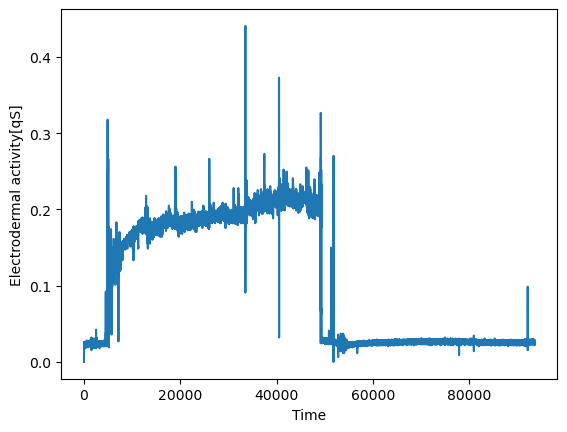

In [270]:
plt.plot([x for x in range(len(eda))], eda)
plt.xlabel('Time')
plt.ylabel('Electrodermal activity[qS]')
plt.show()

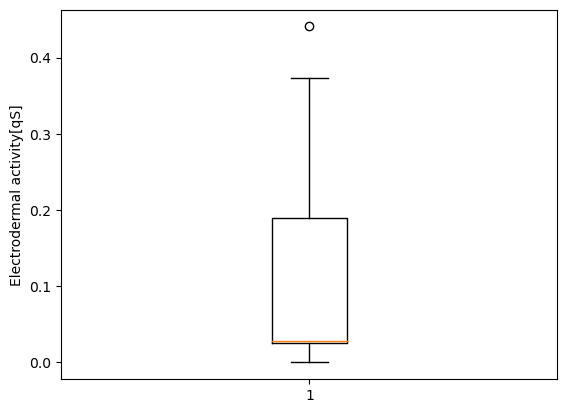

In [312]:
plt.boxplot(eda)
plt.ylabel('Electrodermal activity[qS]')
plt.show()

In [373]:
print('eda > 0.4: ', (eda['Electrodermal activity[qS]'] > 0.4).sum())
eda.loc[eda['Electrodermal activity[qS]'] > 0.4, 'Electrodermal activity[qS]']

eda > 0.4:  1


33506    0.440778
Name: Electrodermal activity[qS], dtype: float64

# Prosječni broj otkucaja srca
Izražen iz BVP signala.

In [313]:
hr = pd.read_csv('Data/S1/Final/HR.csv') 
hr.columns = ["Average heart rate"]
frequencyHR = hr._get_value(0, "Average heart rate")
print("Brzina uzorkovanja: %.1f Hz" % (frequencyHR))

Brzina uzorkovanja: 1.0 Hz


In [272]:
hr = hr.drop(0)
hr.head()

,Average heart rate
1,116.00
2,82.50
3,96.33
4,86.25
5,98.60


In [273]:
hr.shape

(23387, 1)

In [274]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23387 entries, 1 to 23387
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Average heart rate  23387 non-null  float64
dtypes: float64(1)
memory usage: 182.8 KB


In [275]:
hr.describe()

,Average heart rate
count,23387.000000
mean,106.121509
std,18.716789
min,62.280000
25%,91.170000
50%,108.280000
75%,118.550000
max,174.850000


Pomoću linijskog grafa uočavamo kako prosjećni broj otkucaja srca raste pri kraju ispita.

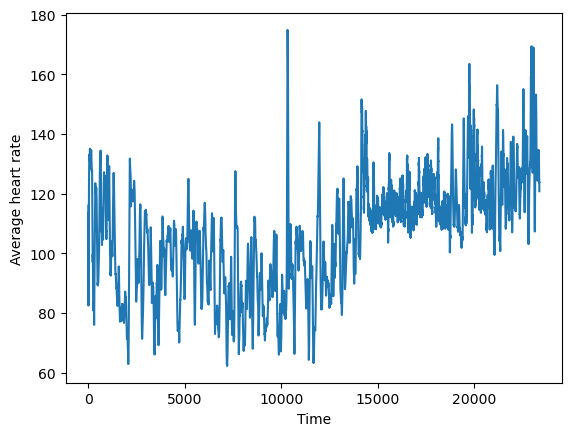

In [276]:
plt.plot([x for x in range(len(hr))], hr)
plt.xlabel('Time')
plt.ylabel('Average heart rate')
plt.show()

# Vrijeme između pojedinačnih otkucaja srca
Izraženo iz BVP signala.
Prvi stupac je vrijeme (u odnosu na početno vrijeme) otkrivenog otkucaja izraženog u sekundama.
Drugi stupac predstavlja trajanje odtkucaja.
Za ovu tablicu nije potrebna brzina uzorkovanja.

In [332]:
ibi = pd.read_csv('Data/S1/Final/IBI.csv') 
ibi.columns = ['Time', 'Interbeat interval']
ibi = ibi.drop(0)
ibi.head()

,Time,Interbeat interval
1,85.347657,0.500023
2,85.722674,0.375017
3,107.754932,0.437520
4,108.223704,0.468771
5,108.645598,0.421894


In [333]:
ibi.shape

(2167, 2)

In [334]:
ibi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 1 to 2167
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                2167 non-null   float64
 1   Interbeat interval  2167 non-null   float64
dtypes: float64(2)
memory usage: 34.0 KB


In [335]:
ibi.describe()

,Time,Interbeat interval
count,2167.000000,2167.000000
mean,6222.101301,0.564451
std,3384.500134,0.080109
min,85.347657,0.328140
25%,3640.502580,0.515649
50%,6319.648654,0.562526
75%,8750.002090,0.609403
max,20794.217468,1.062549


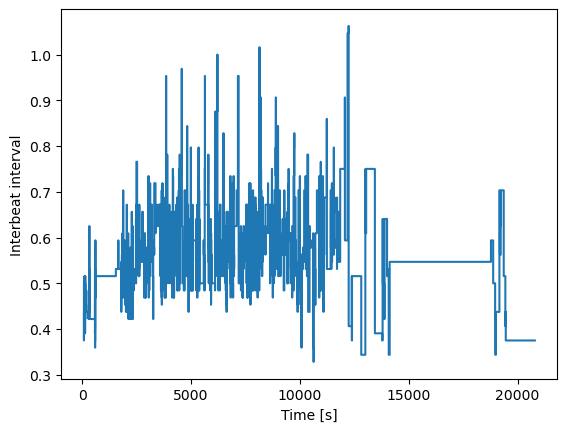

In [336]:
plt.plot(ibi.iloc[:,0], ibi.iloc[:,1], ds='steps')
plt.xlabel('Time [s]')
plt.ylabel('Interbeat interval')
plt.show()

# Temperatura (Celsius [°C])

In [378]:
temp = pd.read_csv('Data/S1/Final/TEMP.csv') 
temp.columns = ["Temperature[°C]"]
frequencyTEMP = temp._get_value(0, "Temperature[°C]")
print("Brzina uzorkovanja: %.1f Hz" % (frequencyTEMP))

Brzina uzorkovanja: 4.0 Hz


In [379]:
temp = temp.drop(0)
temp.head()

,Temperature[°C]
1,21.89
2,21.89
3,21.89
4,21.89
5,21.89


In [380]:
temp.shape

(93584, 1)

In [381]:
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93584 entries, 1 to 93584
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature[°C]  93584 non-null  float64
dtypes: float64(1)
memory usage: 731.3 KB


In [382]:
temp.describe()

,Temperature[°C]
count,93584.000000
mean,26.184411
std,3.849641
min,17.190000
25%,22.810000
50%,24.110000
75%,29.950000
max,31.210000


Na linijskom grafu uočavamo kako je temperatura studenta rasla i padala tijekom ispita.

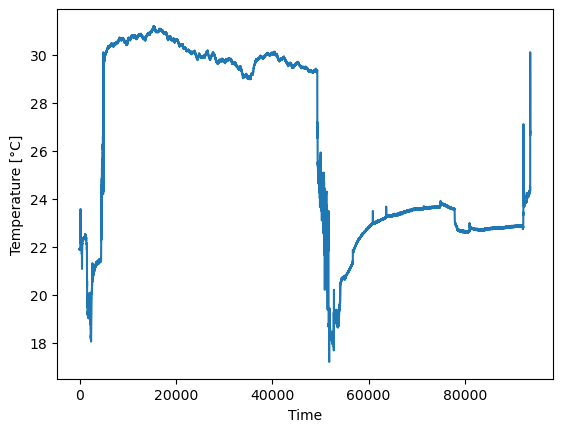

In [383]:
plt.plot([x for x in range(len(temp))], temp)
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')
plt.show()